In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('~/work/btc-without-date-copy-1.csv')
# Matrix of features
X=dataset.iloc[:, 4:5].values
# Matrix of dependent variables
y=dataset.iloc[:, 0:1].values

In [3]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values='NaN',strategy='mean',axis=0)
imputer.fit(X)
X = imputer.transform(X)

In [4]:
# Feature scaling
# Minimizes the Euclidean distance is shorter preventing the higher numbers from dominating the lower numbers
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X= sc_X.fit_transform(X)
#Same thing for y
sc_y = StandardScaler()
y = sc_y.fit_transform(y)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [5]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 0)
regressor.fit(X, y)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

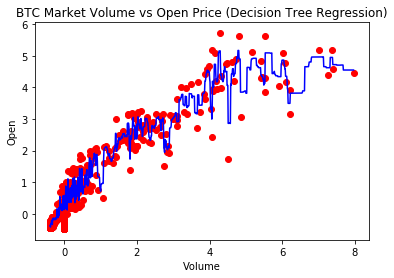

In [6]:
# Visualising the Decision Tree Regression results (higher resolution)
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('BTC Market Volume vs Open Price (Decision Tree Regression)')
plt.xlabel('Volume')
plt.ylabel('Open')
plt.show()

In [7]:
# Predicting a new result
y_pred = regressor.predict(10000)
y_pred = sc_y.inverse_transform(y_pred)